In [75]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h2> Skills </h2>
Come prima parte della generazione dei dati, è necessario specificare quali siano le possibili skill che un developer possa avere.


In [76]:
with sqlite3.connect('../datasets/skills_dataset.db') as skills_conn:
    skills_frame = pd.read_sql('SELECT * FROM Skills', skills_conn, index_col='ID') 
skills_frame

,SKILL,TYPE
ID,,
0,JavaScript,Programming Language
1,HTML,Programming Language
2,Python,Programming Language
3,SQL,Programming Language
4,TypeScript,Programming Language
...,...,...
100,Git,Tool
101,Travis,Tool
102,Swift,Programming Language


<h2> Generazione dei profili</h2>
<p> Si passa quindi ad usare un LLM per la generazione dei dati, in particolare GPT 3.5 Turbo</p>
<p> La generazione si svolge in questo modo</p>
<ul>
    <li> Generazione dei linguaggi di programmazione. </li>
    <li> Generazione dei framework. </li>
    <li> Generazione dei dei database conosciuti. </li>
    <li> Generazione dei tools conosciuti. </li>
    <li> Generazione delle piattaforme cloud. </li>
</ul>

<p> Sono state generate 508 tuple. </p>

In [77]:
gpt_generated_frame = pd.read_csv('../datasets/new_gpt_generated_dataset.csv', index_col='ID')

#gpt_generated_frame.drop_duplicates()

gpt_generated_frame


,Linguaggi di Programmazione,Framework,Database,Tools,Cloud
ID,,,,,
1,"HTML,CSS,JavaScript","React,Angular,Vue.js","MySQL,Oracle","npm,Webpack,Visual Studio",Heroku
2,"Python,JavaScript","Django,Flask,NumPy","MongoDB,MySQL","Pip,Homebrew,Composer",AWS
3,"TypeScript,JavaScript,CSS","React,Angular,Vue.js","PostgreSQL,MySQL","Yarn,Webpack,CMake",Google Cloud
4,"Bash,Python","NumPy,PyTorch,Scikit-Learn","MongoDB,Redis","Docker,Pacman,Homebrew",Docker
5,"Java,C++,HTML,CSS,JavaScript","Spring,JavaEE,React,Angular,Vue.js","MySQL,Oracle,Microsoft SQL Server","Maven,Gradle,Kubernetes",Azure
...,...,...,...,...,...
504,"CSS,JavaScript,HTML","React,Angular,Vue.js","MySQL,PostgreSQL","npm,Webpack,Visual Studio",Vercel
505,"HTML,CSS,JavaScript","React,Angular,Vue.js","MySQL,Redis","npm,Webpack,Visual Studio",Netlify
506,"Python,JavaScript,CSS","Django,Flask,NumPy","MongoDB,MySQL","Pip,Homebrew,Composer",AWS


<h2> Esplorazione dei dati Generati </h2>
<p> Si passa ora all'esplorazione dei dati generati. <br> </p>

C:\Users\Iacopo\AppData\Local\Temp\ipykernel_3520\4061154623.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_skills['count'], y=sorted_skills['SKILL'], palette="viridis")


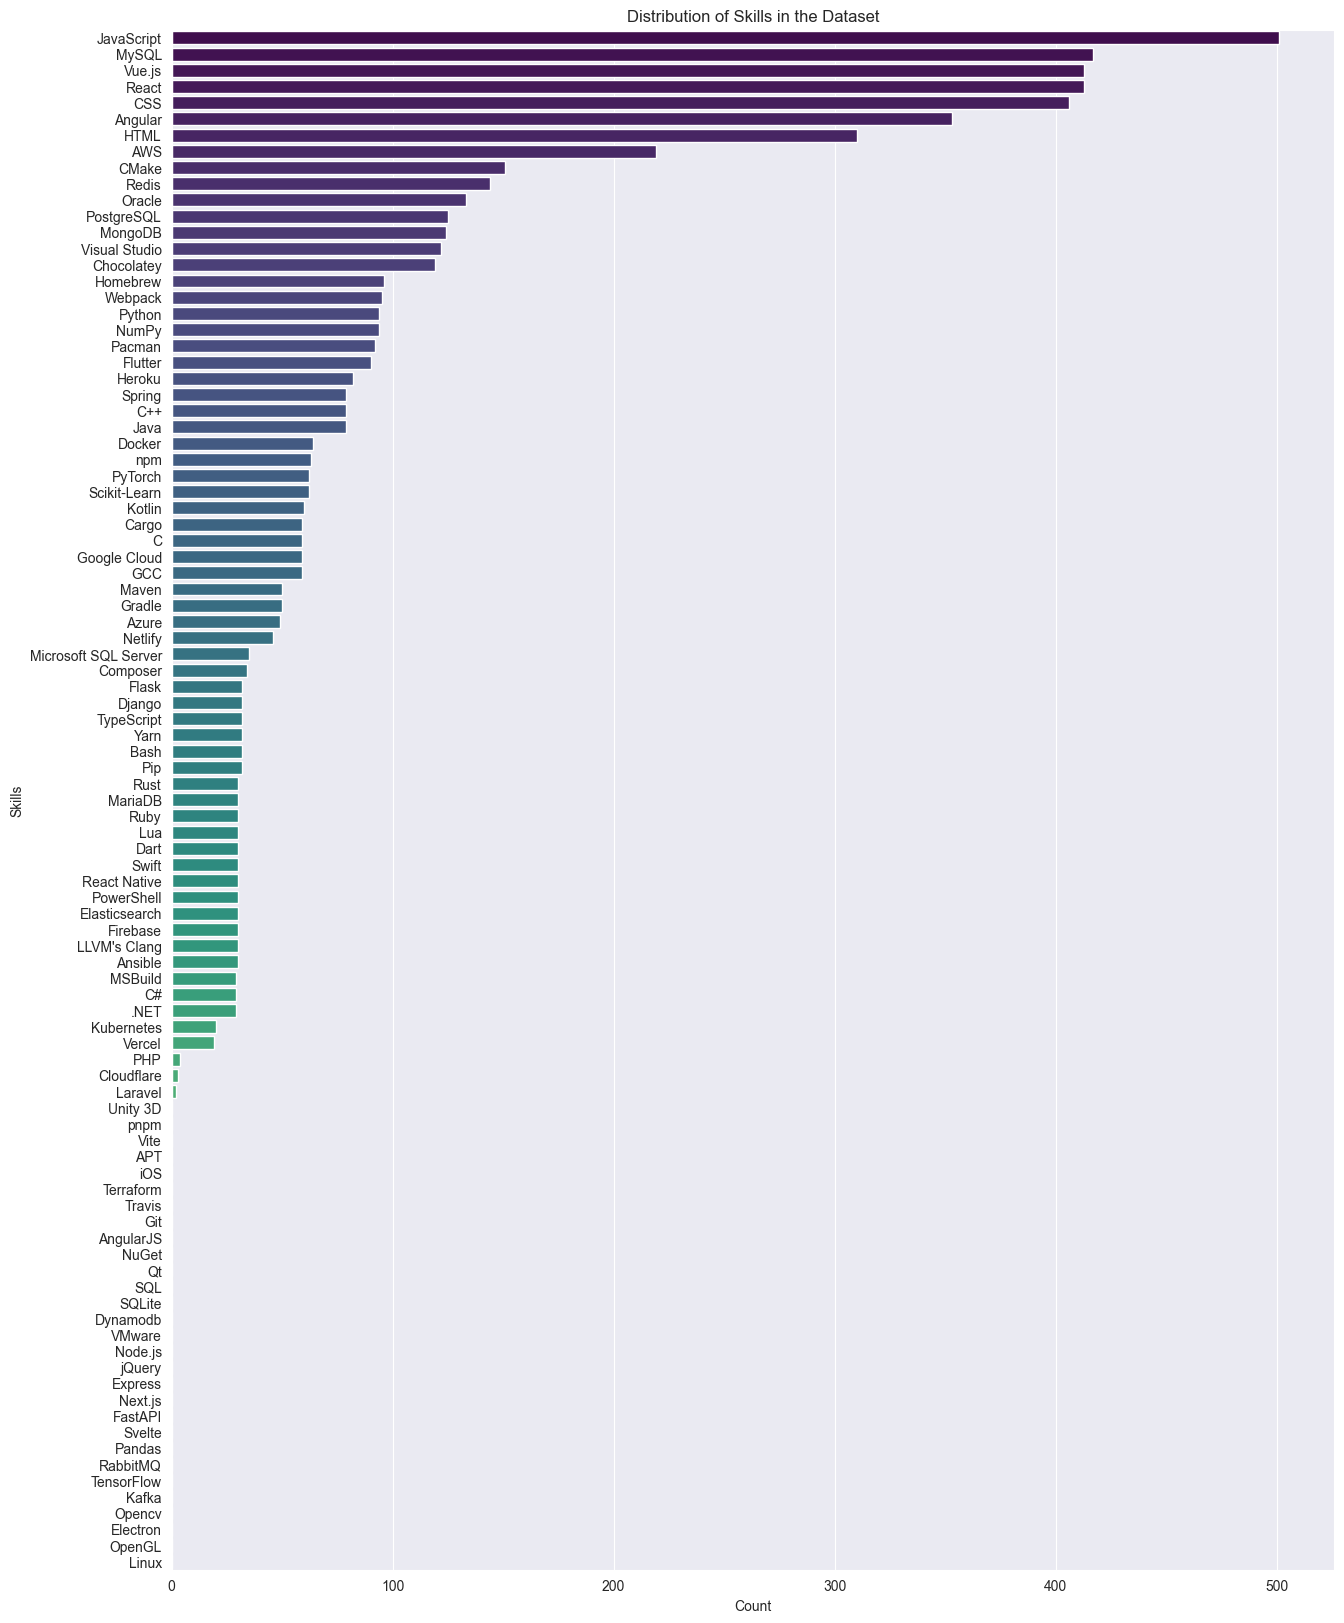

In [79]:
gpt_generated_frame.rename(columns={
    'Linguaggi di Programmazione': 'progLang',
    'Framework' : 'framework',
    'Database' : 'database',
    'Tools' : 'tools',
    'Cloud' : 'cloud'}, inplace= True)

skills_frame['count'] = 0

#for item in gpt_generated_frame.loc[:,'progLang']:
# Funzione per conteggio delle competenze
def count_skills(row, column_name):
    skills = row[column_name].split(',')
    skills_frame.loc[skills_frame['SKILL'].isin(skills), 'count'] += 1

for column in gpt_generated_frame.columns:
    gpt_generated_frame.apply(count_skills, args=(column,), axis=1)

sorted_skills = skills_frame.sort_values(by='count',ascending= False)

plt.figure(figsize=(15, 20))
sns.barplot(x=sorted_skills['count'], y=sorted_skills['SKILL'], palette="viridis")
plt.title("Distribution of Skills in the Dataset")
plt.xlabel("Count")
plt.ylabel("Skills")
plt.show()

<h3> Considerazioni </h3>
<p> L'analisi per frequenza delle skill del dataset sintetico mostra alcune criticità </p>
<ul>
    <li> Anzitutto un elevato numero di tool non risulta utilizzato </li>
    <li> Pare che il framework Vue.js abbia monopolizzato la generazione, lasciando altri framework di JS più popolari completamente non utilizzati </li>
    <li> Un comportamento simile lo ha la Skill "MongoDB", che appare molto frequentemente rispetto ad esempio a "Microsoft SQL Server" </li>
    <li> Tool estremamente usati come Git sono assenti </li>
    <li> Oracle, il RDMBS più usato al mondo, è solo terzo, dopo Redis </li>
    <li> Complessivamente molte skill non sono usate </li>
    <li> Nel dataset appaiono skill che non sono state fornite per la generazione o che si presentano in nome diverso </li> 